##  Optimization manual steps

In [1]:
import random
import numpy as np
import pprint

from mycrograd_debug.engine_debug import Value
from mycrograd_debug.nn_debug import Neuron, Layer, MLP
from mycrograd_debug.drawviz_debug import draw_dot

np.random.seed(1337)
random.seed(1337)
pp = pprint.PrettyPrinter(indent=4)

#### Multi Layer Perceptron 1-2-1

In [2]:
# loss function single MLP
def loss_single(target, output):
    total_loss = (output - target)*(output - target)
    total_loss.type="l"
    return total_loss

In [11]:
# initialize a model
nin = 1  # number of inputs
nout = 1  # number of outputs
Value.value_counter = 0

model = MLP(
    nin, [2, nout], weightsinit=1, lastReLU=False
)  # 2-layer neural network
xinumbers = list(range(1, nin + 1))
xinput = [Value(x, type="i") for x in xinumbers]
print("inputs= ", xinput[0].data)
# print(model.layers[0].neurons[0].w)
# print(model.layers[0].neurons[1].w)
print("weights=",model.layers[0].neurons[0].w[0].data," , ",model.layers[0].neurons[1].w[0].data)

model.layers[0].neurons[0].w[0].data=0.3
model.layers[0].neurons[1].w[0].data=0.4
model.layers[1].neurons[0].w[0].data=0.5
model.layers[1].neurons[0].w[1].data=0.6
print("weights=",model.layers[0].neurons[0].w[0].data," , ",model.layers[0].neurons[1].w[0].data)
print("parameters")
pp.pprint(model.parameters())

xtarget = Value(1.2, type="t")  # desired targets

inputs=  1
weights= 0.1  ,  0.1
weights= 0.3  ,  0.4
parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.3, grad=0),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.4, grad=0),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0, grad=0),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.5, grad=0),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.6, grad=0),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0, grad=0)]


In [4]:
# Optimization Step
def opt_step():
    #### forward pass0
    activation = model(xinput)
    loss = loss_single(activation, xtarget)
    print("loss= ", loss.data)
    activation = model(xinput)
    loss = loss_single(activation, xtarget)
    print("loss= ", loss.data)

    #### backward pass
    for p in model.parameters():
        p.grad = 0.0
    loss.backward()

    draw_dot(loss, debug_print_01=False)

    #### update
    for p in model.parameters():
        p.data += -0.1 * p.grad
    print("updated parameters")
    pp.pprint(model.parameters())

In [5]:
opt_step()

loss=  0.6560999999999999
loss=  0.6560999999999999
updated parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.381, grad=-0.8099999999999999),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.081, grad=-0.8099999999999999),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.49720000000000003, grad=-0.9719999999999999),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.0972, grad=-0.9719999999999999),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.5486, grad=-0.48599999999999993),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.6648, grad=-0.648),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.162, grad=-1.6199999999999999)]


In [6]:
opt_step()

loss=  0.15162432289050246
loss=  0.15162432289050246
updated parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.42372383568960004, grad=-0.42723835689600004),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.1237238356896, grad=-0.42723835689600004),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.5489732518528, grad=-0.5177325185280001),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.1489732518528, grad=-0.5177325185280001),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.584579606432, grad=-0.3597960643200001),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.7110906451583999, grad=-0.4629064515840001),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.239877936, grad=-0.7787793600000001)]


In [7]:
opt_step()

loss=  0.02067616518020619
loss=  0.02067616518020619
updated parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.44053542037932236, grad=-0.16811584689722345),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.14053542037932235, grad=-0.16811584689722345),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.5694230938787899, grad=-0.20449842025989884),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.1694230938787899, grad=-0.20449842025989884),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.6003233354114564, grad=-0.15743728979456423),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.7311624824699315, grad=-0.20071837311531648),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.2686363540233936, grad=-0.2875841802339356)]


In [8]:
opt_step()

loss=  0.0017906986926883388
loss=  0.0017906986926883388
updated parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.44561615462600807, grad=-0.05080734246685698),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.14561615462600805, grad=-0.05080734246685698),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.5756111629499856, grad=-0.06188069071195761),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.17561116294998566, grad=-0.06188069071195761),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.6052411294505128, grad=-0.049177940390563696),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.7374155812714303, grad=-0.06253098801498745),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.2770996836109456, grad=-0.08463329587552026)]


In [9]:
opt_step()

loss=  0.00012319130058674693
loss=  0.00012319130058674693
updated parameters
[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.44695968796867247, grad=-0.013435333426644071),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.14695968796867245, grad=-0.013435333426644071),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.5772481013083187, grad=-0.01636938358333146),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.1772481013083188, grad=-0.01636938358333146),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.6065535655723965, grad=-0.013124361218837269),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.7390831682768224, grad=-0.016675870053921103),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.2793195151413708, grad=-0.02219831530425198)]


[   Value(name=val1,neuronnumber=n1,weightnumber=,type=w1,data=0.44695968796867247, grad=-0.013435333426644071),
    Value(name=val2,neuronnumber=n1,weightnumber=,type=b,data=0.14695968796867245, grad=-0.013435333426644071),
    Value(name=val3,neuronnumber=n2,weightnumber=,type=w1,data=0.5772481013083187, grad=-0.01636938358333146),
    Value(name=val4,neuronnumber=n2,weightnumber=,type=b,data=0.1772481013083188, grad=-0.01636938358333146),
    Value(name=val5,neuronnumber=n1,weightnumber=,type=w1,data=0.6065535655723965, grad=-0.013124361218837269),
    Value(name=val6,neuronnumber=n1,weightnumber=,type=w2,data=0.7390831682768224, grad=-0.016675870053921103),
    Value(name=val7,neuronnumber=n1,weightnumber=,type=b,data=0.2793195151413708, grad=-0.02219831530425198)]
loss=  7.846305963472491e-06


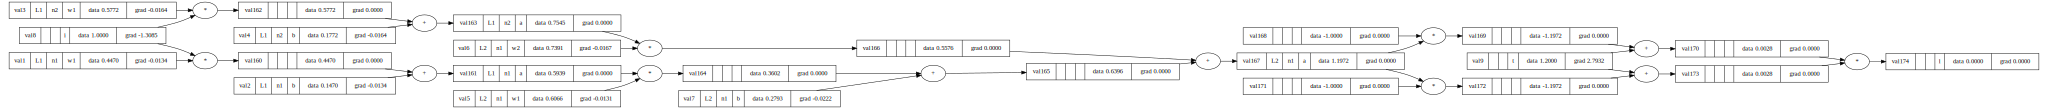

In [10]:
pp.pprint(model.parameters())
activation = model(xinput)
loss = loss_single(activation, xtarget)
print("loss= ", loss.data)
draw_dot(loss)